In this section we expolre the AR2 distribution for different parameters.

In [1]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import sklearn
import entropy_estimators as ee
import time
import itertools
import scipy.io


c:\Users\BK\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pip
# pip.main(['install', 'statsmodels'])

Firstly generate AR2 series
Need MkSg_AR function, alternative here is ArmaProcess

[ 0.16849601 -0.74383228 -0.56808819 ... -2.88407412 -1.43514156
 -2.17038054]
0.769900956332


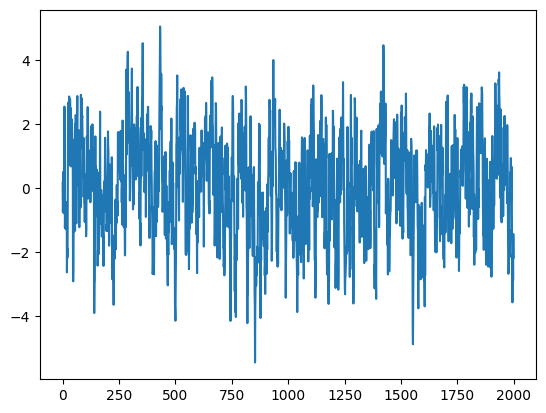

In [3]:
arparams = np.array([0.8])
ar = np.r_[1, -arparams]
aaa = ArmaProcess(ar, [1]).generate_sample(2000)
print(aaa)
plt.plot(aaa)
# ArmaProcess(ar, [1]).acf(10)
bbb = acf(aaa, nlags=1,fft=True)[1]
print(bbb)



100%|██████████| 10000/10000 [00:00<00:00, 11537.12it/s]


0.9698264598846436


100%|██████████| 10000/10000 [00:01<00:00, 7078.54it/s]

1.4137203693389893


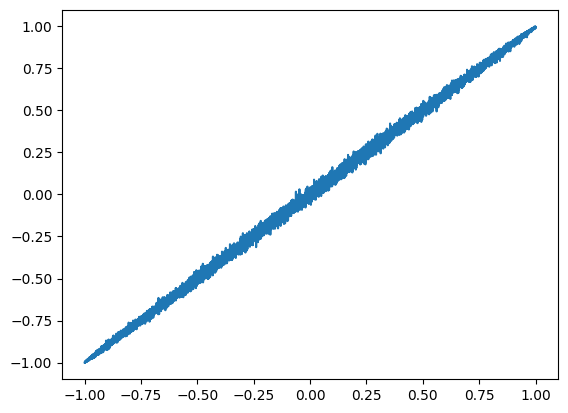

In [55]:
# generate 1000 samples of AR(1) process

a_num = 10000

t1 = time.time()

lag1para = np.linspace(-1, 1, a_num)
series_length = 2000
ARpara = [np.r_[1, -arparams] for arparams in lag1para]
AR1matrix = [ArmaProcess(ar, [1]).generate_sample(series_length) for ar in tqdm(ARpara)]

t2 = time.time()
print(t2-t1)
# calculate the autocorrelation of lag 1
AR1acf = [acf(series, nlags=1,fft=True)[1] for series in tqdm(AR1matrix)]
t3 = time.time()
print(t3-t2)
plt.plot(lag1para, AR1acf)





In [59]:
test_series = np.array(AR1matrix[999])
ee.mi(test_series[:-1], test_series[1:])

0.8238667746763612

100%|██████████| 10000/10000 [01:12<00:00, 136.99it/s]


73.01083731651306


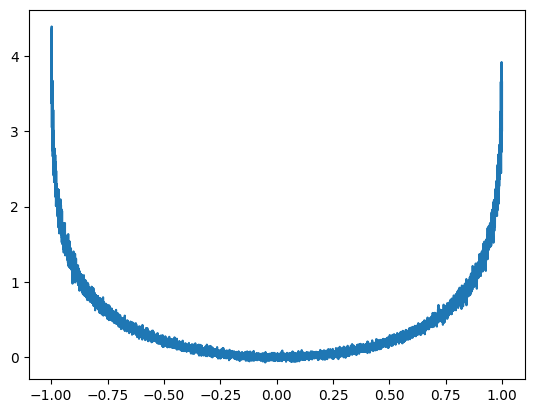

In [60]:
t0 = time.time()
AMI1NaturalLogarithm = [ee.mi(series[:-1], series[1:]) for series in tqdm(AR1matrix)]
plt.plot(lag1para, AMI1NaturalLogarithm)
t1 = time.time()
print(t1-t0)

In [22]:
# generate 500*500 samples of AR(2) process
a_num = 500

t1 = time.time()

lag1para = np.linspace(-1, 1, a_num)
lag2para = np.linspace(-1, 1, a_num)
series_length = 2000

param_list = np.array(list(itertools.product(lag1para, lag2para)))

ARpara = [np.r_[1, -arparams] for arparams in param_list]
AR2matrix = [ArmaProcess(ar, [1]) for ar in tqdm(ARpara)]

t2 = time.time()
print(t2-t1)
# get the range of available lag 1 and lag 2
param_condition = [process.isstationary for process in tqdm(AR2matrix)]
t3 = time.time()
print(t3-t2)
available_param = param_list[param_condition]
print(available_param.shape)

100%|██████████| 250000/250000 [00:03<00:00, 64474.87it/s]


5.137988805770874


100%|██████████| 250000/250000 [00:10<00:00, 24076.51it/s]

10.385564804077148
(186794, 2)


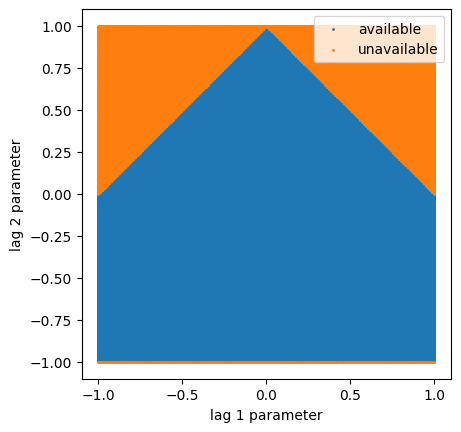

In [34]:
available_param = param_list[param_condition]
unavailable_param = param_list[~np.array(param_condition)]

plt.scatter(available_param[:,0], available_param[:,1], s=1, label='available')
plt.scatter(unavailable_param[:,0], unavailable_param[:,1], s=1, label='unavailable')
plt.Axes.set_aspect(plt.gca(), 'equal')
plt.xlabel('lag 1 parameter')
plt.ylabel('lag 2 parameter')
plt.legend()

a2 < 1-abs(a1)
a2 > -1

In [142]:
# compute AC1, AC2, PAC1 for each available AR(2) process
a_num = 200

t1 = time.time()

lag1para = np.linspace(-0.999, 0.999, a_num)
lag2para = np.linspace(-0.999, 0.999, a_num)
series_length = 2000

param_list = np.array(list(itertools.product(lag1para, lag2para)))
available_param = [param for param in param_list if param[1] < 1-abs(param[0])]


ARpara = [np.r_[1, -arparams] for arparams in available_param]
print('Generating AR(2) process...')

AR2matrix = [ArmaProcess(ar, [1]).generate_sample(series_length) for ar in tqdm(ARpara)]

print('Computing AC1...')
AC1 = [acf(series, nlags=1,fft=True)[1] for series in tqdm(AR2matrix)]
print('Computing AC2...')
AC2 = [acf(series, nlags=2,fft=True)[2] for series in tqdm(AR2matrix)]
available_param = np.array(available_param)
# plt.legend()

Generating AR(2) process...


100%|██████████| 29900/29900 [00:02<00:00, 11381.55it/s]


Computing AC1...


100%|██████████| 29900/29900 [00:04<00:00, 7404.71it/s]


Computing AC2...


100%|██████████| 29900/29900 [00:04<00:00, 7404.52it/s]


In [147]:
print('Computing PAC2...')
PAC2 = [pacf(series, nlags=2)[2] for series in tqdm(AR2matrix)]

Computing PAC2...


100%|██████████| 29900/29900 [00:02<00:00, 12500.08it/s]


<Figure size 500x1000 with 0 Axes>

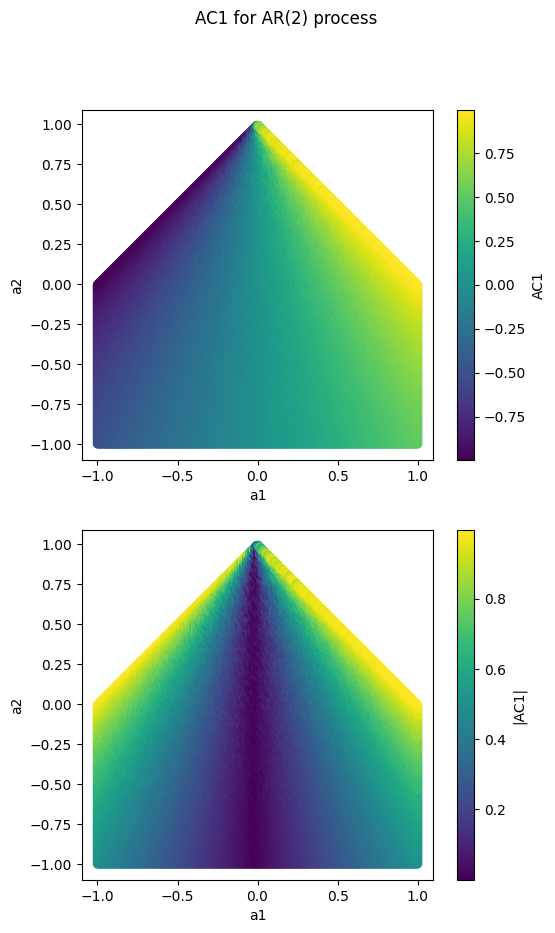

In [141]:
# AC1
plt.figure(figsize=(5,10))
fig, [ax1,ax2] = plt.subplots(2, 1,figsize=(6,10))

ax1.scatter(available_param[:,0], available_param[:,1], c=AC1)
ax1.set_xlabel('a1')
ax1.set_ylabel('a2')
ax1.set_aspect('equal')
# ax1.set_title('AC1 for AR(2) process')
cbar = fig.colorbar(ax=ax1, mappable=ax1.collections[0])
cbar.set_label('AC1')

ax2.scatter(available_param[:,0], available_param[:,1], c=np.abs(AC1))
ax2.set_xlabel('a1')
ax2.set_ylabel('a2')
ax2.set_aspect('equal')
# ax2.set_title('AC1 for AR(2) process')
cbar = fig.colorbar(ax=ax2, mappable=ax2.collections[0])
cbar.set_label('|AC1|')

fig.suptitle('AC1 for AR(2) process')
plt.show()

<Figure size 500x1000 with 0 Axes>

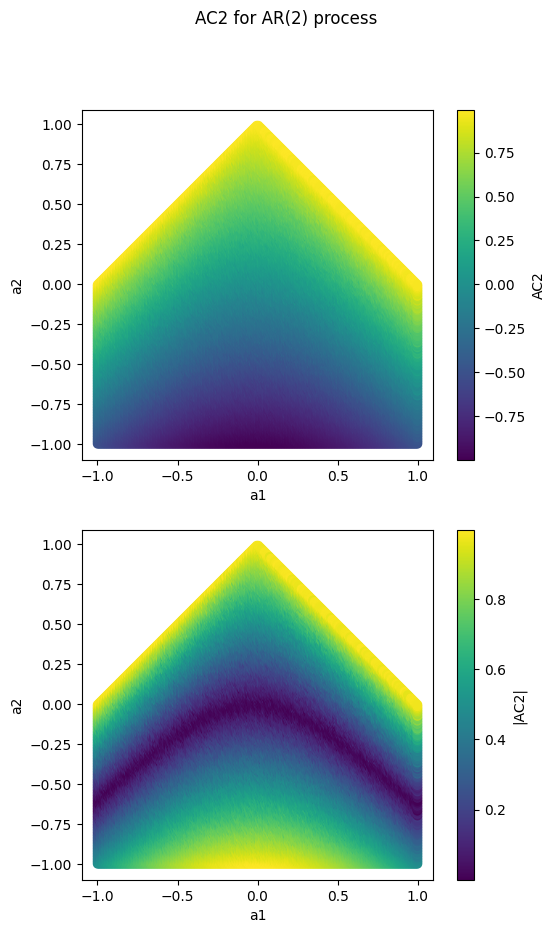

In [143]:
# AC2

plt.figure(figsize=(5,10))
fig, [ax1,ax2] = plt.subplots(2, 1,figsize=(6,10))

ax1.scatter(available_param[:,0], available_param[:,1], c=AC2)
ax1.set_xlabel('a1')
ax1.set_ylabel('a2')
ax1.set_aspect('equal')

cbar = fig.colorbar(ax=ax1, mappable=ax1.collections[0])
cbar.set_label('AC2')

ax2.scatter(available_param[:,0], available_param[:,1], c=np.abs(AC2))
ax2.set_xlabel('a1')
ax2.set_ylabel('a2')
ax2.set_aspect('equal')

cbar = fig.colorbar(ax=ax2, mappable=ax2.collections[0])
cbar.set_label('|AC2|')

fig.suptitle('AC2 for AR(2) process')
plt.show()

<Figure size 500x1000 with 0 Axes>

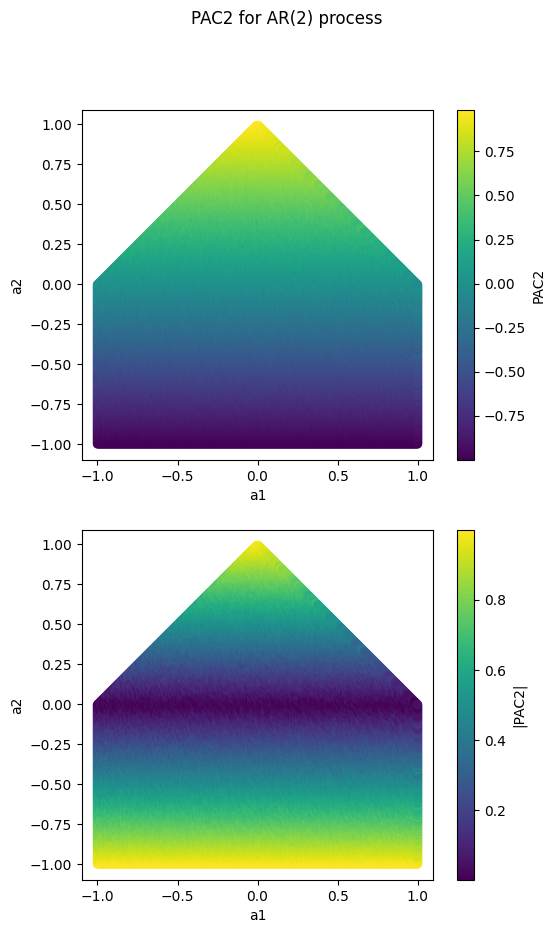

 10%|▉         | 2970/29900 [00:32<03:19, 134.69it/s]

In [151]:
# PAC2
plt.figure(figsize=(5,10))
fig, [ax1,ax2] = plt.subplots(2, 1,figsize=(6,10))

ax1.scatter(available_param[:,0], available_param[:,1], c=PAC2)
ax1.set_xlabel('a1')
ax1.set_ylabel('a2')
ax1.set_aspect('equal')

cbar = fig.colorbar(ax=ax1, mappable=ax1.collections[0])
cbar.set_label('PAC2')

ax2.scatter(available_param[:,0], available_param[:,1], c=np.abs(PAC2))
ax2.set_xlabel('a1')
ax2.set_ylabel('a2')
ax2.set_aspect('equal')

cbar = fig.colorbar(ax=ax2, mappable=ax2.collections[0])
cbar.set_label('|PAC2|')

fig.suptitle('PAC2 for AR(2) process')
plt.show()

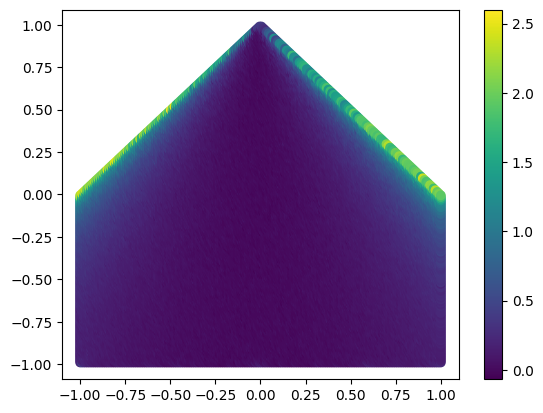

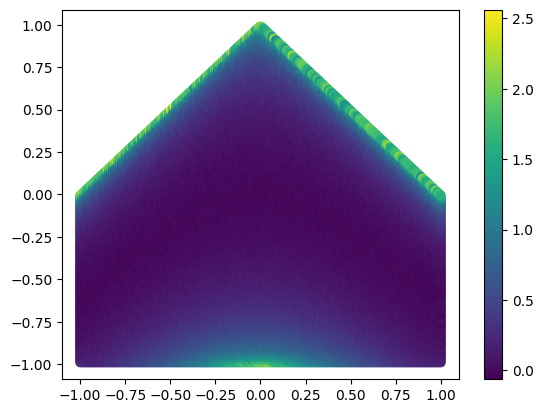

In [2]:
AMI1_matrix = scipy.io.loadmat('AMI1_29700.mat')['AMI1_matrix']
AMI2_matrix = scipy.io.loadmat('AMI2_29700.mat')['AMI2_matrix']
available_param = scipy.io.loadmat('availiable_params_29700')['availiable_params']

plt.figure()
plt.scatter(available_param[:,0], available_param[:,1], c=AMI1_matrix)
plt.colorbar()
plt.figure()
plt.scatter(available_param[:,0], available_param[:,1], c=AMI2_matrix)
plt.colorbar()


In [6]:
AR2matrix = scipy.io.loadmat('a1a2_400square.mat')['AR2matrix']

# print(available_param)
ARpara = [np.r_[1, -arparams] for arparams in available_param]

print('Computing PAC1...')
PAC1 = [pacf(series, nlags=1)[1] for series in tqdm(AR2matrix)]
print('Computing PAC2...')
PAC2 = [pacf(series, nlags=2)[2] for series in tqdm(AR2matrix)]
print('Computing AC1...')
AC1 = [acf(series, nlags=1,fft=True)[1] for series in tqdm(AR2matrix)]
print('Computing AC2...')
AC2 = [acf(series, nlags=2,fft=True)[2] for series in tqdm(AR2matrix)]



Computing PAC1...


100%|██████████| 29700/29700 [00:01<00:00, 18242.59it/s]


Computing PAC2...


100%|██████████| 29700/29700 [00:03<00:00, 9252.25it/s]


Computing AC1...


100%|██████████| 29700/29700 [00:04<00:00, 6816.87it/s]


Computing AC2...


100%|██████████| 29700/29700 [00:04<00:00, 6862.06it/s]


Text(0.5, 0.98, 'AC-AMI correlation for AR(2) process')

<Figure size 1000x1000 with 0 Axes>

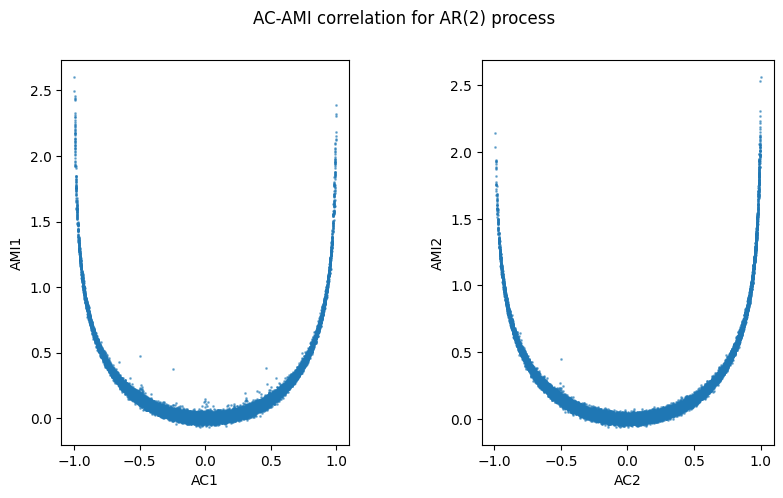

In [32]:
plt.figure(figsize=(10,10))
fig, [ax1,ax2] = plt.subplots(1, 2,figsize=(10,5))

ax1.scatter(AC1, AMI1_matrix,alpha=0.5, s=1)
ax1.set_xlabel('AC1')
ax1.set_ylabel('AMI1')
ax1.set_aspect('equal')

ax2.scatter(AC2, AMI2_matrix,alpha=0.5, s=1)
ax2.set_xlabel('AC2')
ax2.set_ylabel('AMI2')
ax2.set_aspect('equal')


fig.suptitle('AC-AMI correlation for AR(2) process')




Text(0.5, 1.0, 'PAC-AMI correlation for AR(2) process')

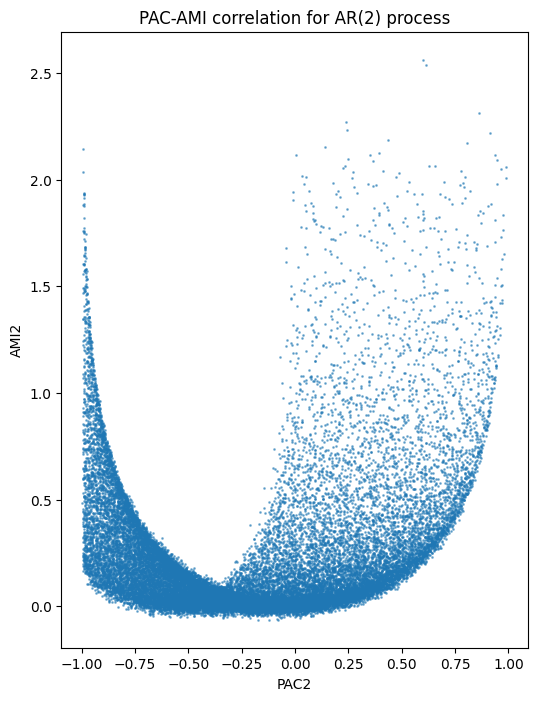

In [44]:
plt.figure(figsize=(8,8))


plt.scatter(PAC2, AMI2_matrix,alpha=0.5, s=1)
plt.xlabel('PAC2')
plt.ylabel('AMI2')
plt.Axes.set_aspect(plt.gca(), 'equal')
plt.title('PAC-AMI correlation for AR(2) process')